In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import pickle
import json
import geopandas as geopd
import pycountry as pc
import pycountry_convert as pc_conv
import folium

In [12]:
with open(r"output_2019 speakers_False keywords_['hurricane', 'climate change'].pickle_code_count.json") as json_file:
    dict_code_count = json.load(json_file)

In [13]:
dict_country_count = {}

# Load the dictionary <code : country_name>
with open('country_code_dict.json') as json_file:
    dict_code_country = json.load(json_file)

for nationality_code in dict_code_count:
    if nationality_code in dict_code_country:
        dict_country_count[dict_code_country[nationality_code]] = dict_code_count[nationality_code]
    else:
        print("Need to fetch :" + nationality_code)
        api_url = "http://www.wikidata.org/entity/" + nationality_code
        response = requests.get(api_url)
        country_name = response.json()['entities'][nationality_code]['labels']['en']['value']
        dict_code_country[nationality_code] = country_name
        dict_country_count[country_name] = dict_code_count[nationality_code]

with open('country_code_dict.json', 'w') as fp:
    json.dump(dict_code_country, fp)

In [14]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

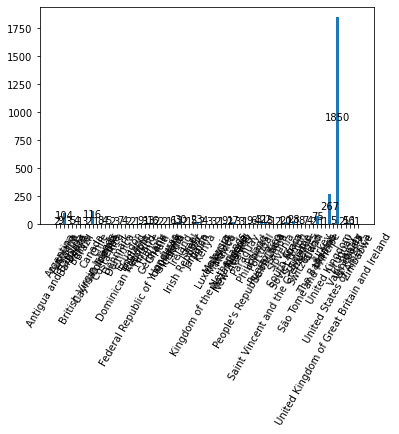

In [15]:
lists = sorted(dict_country_count.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.xticks(rotation=60)
addlabels(x,y)
plt.show()

In [45]:
non_recognized = []
counter = 0
counter2 = 0
dict_continent_count = {}

for element in dict_country_count:
    try:
        continent_code = pc_conv.country_alpha2_to_continent_code(pc_conv.country_name_to_country_alpha2(element, cn_name_format="default"))
        if continent_code in dict_continent_count:
            dict_continent_count[continent_code] += dict_country_count[element]
        else :
            dict_continent_count[continent_code] = dict_country_count[element]
    except:
        if element not in non_recognized:
            non_recognized.append(element)



In [46]:
dict_continent_count

{'NA': 2062, 'EU': 436, 'OC': 123, 'AF': 37, 'SA': 47, 'AS': 37}

In [49]:
data = pd.DataFrame({
   'lon':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lat':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador'],
   'value':[10, 12, 40, 70, 23, 43, 100, 43]
}, dtype=str)


In [71]:
# Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

data = pd.DataFrame({
   'lon':[-100, 8, 135, -57, 20, 90],
   'lat':[50, 49, -25, -13, 0, 55],
   'name':['NA', 'EU', 'OC', 'SA', 'AF', 'AS'],
   'value':[40, 40, 40, 40, 40, 40]})

for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['name'],
      radius=float(data.iloc[i]['value'])*20000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

# Show the map again
m

